<a href="https://colab.research.google.com/github/mmdreza-ghorbani/Thesis_codes/blob/main/LSTM%20with%20tensor%20flow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imputation climatology data

In [ ]:
import numpy as np
from collections.abc import Iterable
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns
class AxTransformer:
    def __init__(self, datetime_vals=False):
        self.datetime_vals = datetime_vals
        self.lr = linear_model.LinearRegression()

        return

    def process_tick_vals(self, tick_vals):
        if not isinstance(tick_vals, Iterable) or isinstance(tick_vals, str):
            tick_vals = [tick_vals]

        if self.datetime_vals == True:
            tick_vals = pd.to_datetime(tick_vals).astype(int).values

        tick_vals = np.array(tick_vals)

        return tick_vals

    def fit(self, ax, axis='x'):
        axis = getattr(ax, f'get_{axis}axis')()

        tick_locs = axis.get_ticklocs()
        tick_vals = self.process_tick_vals([label._text for label in axis.get_ticklabels()])

        self.lr.fit(tick_vals.reshape(-1, 1), tick_locs)

        return

    def transform(self, tick_vals):
        tick_vals = self.process_tick_vals(tick_vals)
        tick_locs = self.lr.predict(np.array(tick_vals).reshape(-1, 1))

        return tick_locs

def set_date_ticks(ax, start_date, end_date, axis='y', date_format='%Y-%m-%d', **date_range_kwargs):
    dt_rng = pd.date_range(start_date, end_date, **date_range_kwargs)

    ax_transformer = AxTransformer(datetime_vals=True)
    ax_transformer.fit(ax, axis=axis)

    getattr(ax, f'set_{axis}ticks')(ax_transformer.transform(dt_rng))
    getattr(ax, f'set_{axis}ticklabels')(dt_rng.strftime(date_format))

    ax.tick_params(axis=axis, which='both', bottom=True, top=False, labelbottom=True)

    return ax


NameError: ignored

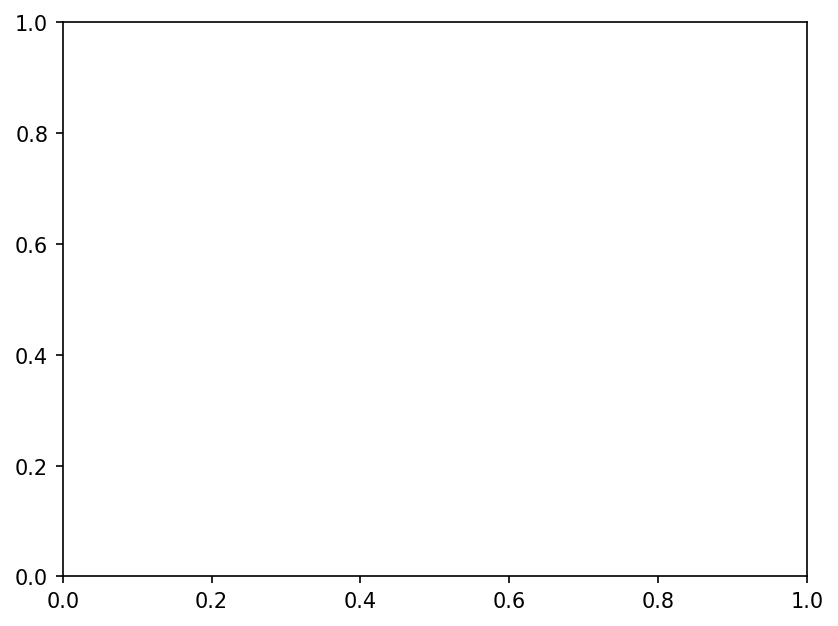

In [ ]:
fig, ax = plt.subplots(dpi=150)
sns.set(rc={'figure.figsize':(20,20)})
sns.heatmap(df.isnull(),ax = ax, cbar=False,cmap='cividis_r')
set_date_ticks(ax, df.index.min(), df.index.max(), freq='3MS')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
newURL = '/content/drive/My Drive/Climatology/'

import numpy as np
import pandas as pd
newtrain =pd.read_excel(newURL+'impute_using_knn_spline.xlsx')
newtrain['Datetime'] = pd.DatetimeIndex(newtrain['Datetime'])
newtrain.set_index('Datetime',inplace = True)
newtrain = newtrain.sort_index()
#newIndex = newIndex['2017-01-01 00:00:00':'2021-01-01 00:00:00']
newtrain.astype(float)

Mounted at /content/drive


,Geophisycs dd,Geophisycs ff,Geophisycs t,Geophisycs td,Geophisycs p0,Geophisycs rrr,Geophisycs u,Geophisycs twet,MehrAbad h,MehrAbad vv,...,Shemiran twet,Chitgar dd,Chitgar ff,Chitgar t,Chitgar td,Chitgar p0,Chitgar rrr,Chitgar u,Chitgar twet,mahalati
Datetime,,,,,,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,0.000000,0.000000,8.500000,3.500000,860.800000,0.000000,71.000000,6.200000,2500.000000,3000.000000,...,5.500000,100.000000,2.000000,8.600000,3.200000,872.600000,0.000000,69.000000,6.100000,181.459686
2017-01-01 01:00:00,-3.146146,-0.401904,8.324082,3.594225,860.476095,0.241189,101.436166,6.339663,4056.579245,-3164.250545,...,5.818151,206.002360,0.825747,6.838466,3.044542,872.472481,0.131737,109.759781,5.949074,176.597565
2017-01-01 02:00:00,-7.778905,-0.430501,8.850755,3.474229,860.293824,0.235196,93.725058,6.713643,3559.705506,-1033.074951,...,6.445416,114.081783,0.433913,6.797034,2.956501,872.209821,0.129059,99.585610,6.545039,199.432602
2017-01-01 03:00:00,0.000000,0.000000,8.400001,4.200000,860.200000,0.021370,75.000000,6.400000,2500.000000,3000.000000,...,5.800000,0.000000,0.000000,7.200000,3.100000,872.100000,0.095946,76.000000,5.400000,169.144699
2017-01-01 04:00:00,23.646397,0.258712,10.428945,3.251777,859.966650,0.223391,58.930410,7.347152,1624.182856,5820.449732,...,7.275067,-53.648297,0.774126,9.224263,2.969347,871.751214,0.123774,57.347295,7.503315,169.581360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-28 17:00:00,276.104146,1.217110,22.258982,-2.873042,858.753354,-0.201595,19.077159,10.837566,1008.415181,21593.177429,...,11.081589,50.513167,2.673716,24.985063,-2.551484,869.900593,-0.253852,15.429228,12.099848,97.987068
2022-05-28 18:00:00,360.000000,2.000000,20.600000,-1.800000,859.200000,0.000000,22.000000,10.200000,1000.000000,10000.000000,...,10.500000,10.000000,3.000000,24.000000,-3.300000,870.300000,0.000000,16.000000,11.400000,84.316048
2022-05-28 19:00:00,416.656602,1.004653,20.060277,-1.124753,858.957785,-0.206663,22.940087,9.864872,1091.765187,-29524.586590,...,9.475646,-14.474355,2.573368,22.931864,-3.331265,870.080764,-0.260069,16.712351,10.934938,83.995544


<Axes: ylabel='Datetime'>

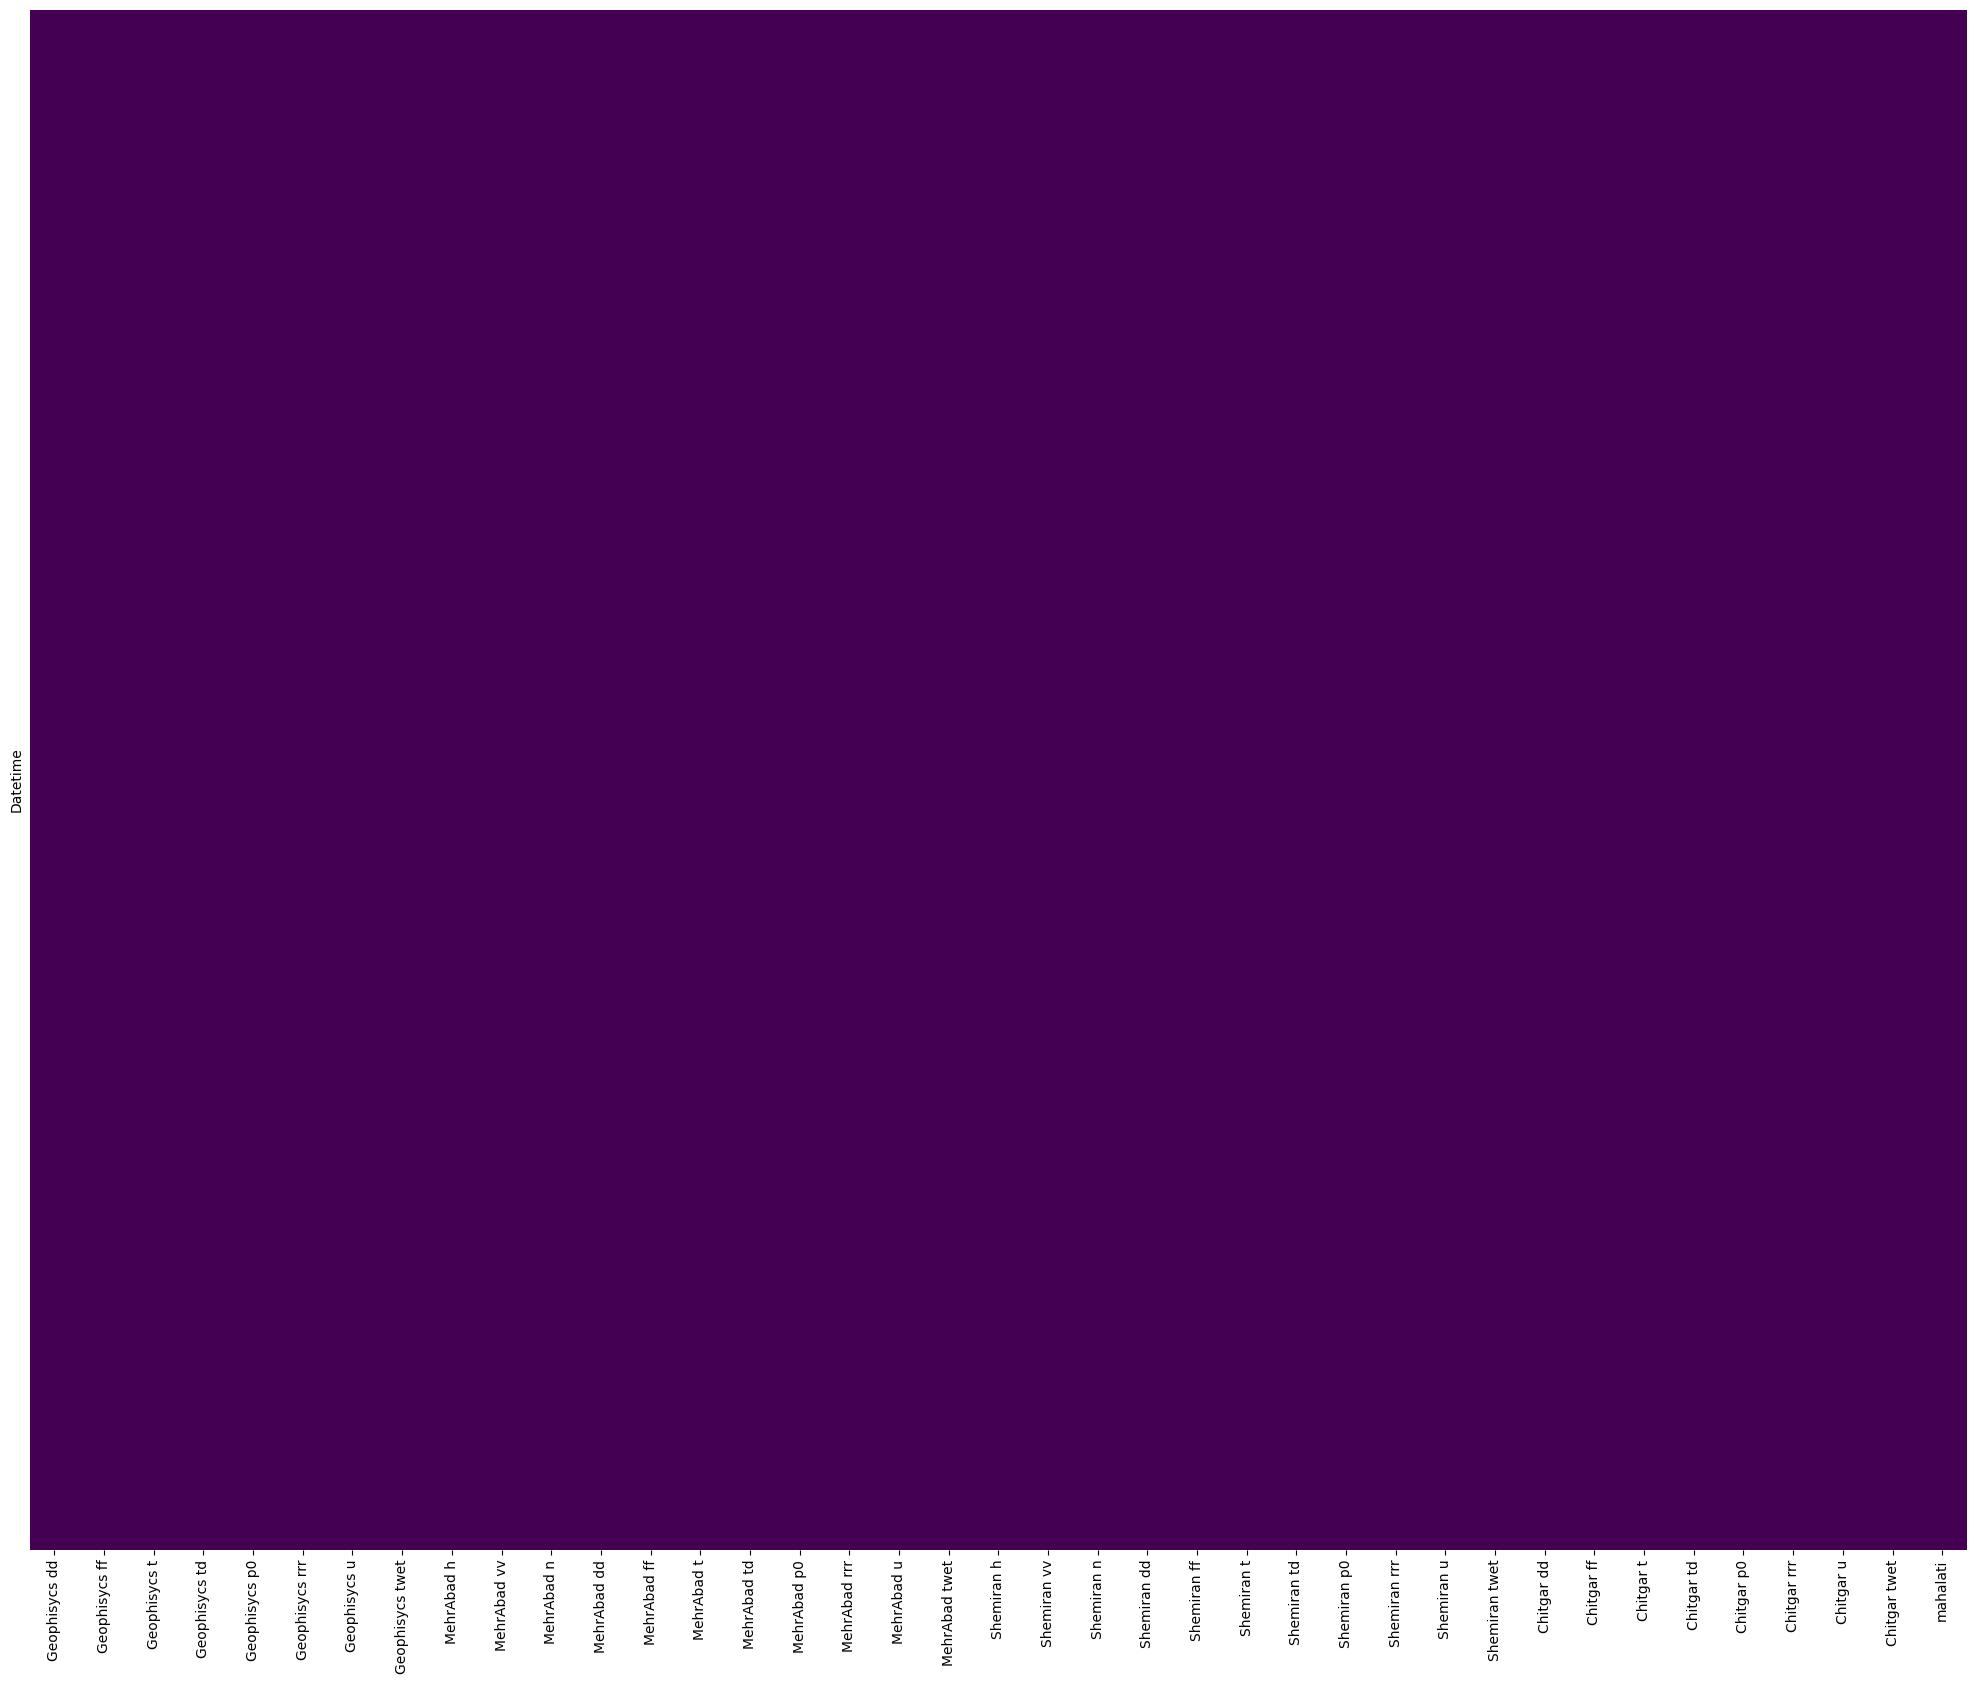

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(25,20))
sns.heatmap(newtrain.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# using KNN

In [ ]:
import pandas as pd
URL='/content/drive/My Drive/AIRNOW/'
dfKNN = pd.read_excel(URL+'impute_using_knn.xlsx')
dfKNN['Datetime'] = pd.DatetimeIndex(dfKNN['Datetime'])
dfKNN.set_index('Datetime',inplace = True)
dfKNN = dfKNN.sort_index()
#newIndex = newIndex['2017-01-01 00:00:00':'2021-01-01 00:00:00']
dfKNN.astype(float)
dfKNN[:'2022-05-28 21:00:00']


,mahalati,aghdasieh,pounak,pirouzi,tarbiatModares,setadBohran,shadAbad,sharif,mantaghe20,mantaghe2,mantaghe16,mantaghe19,mantaghe21,mantaghe22,golbarg,masoudieh,fath
Datetime,,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,182.0,87.0,157.0,199.0,192.0,145.0,163.0,159.0,157.4,136.4,98.6,107.8,190.0,136.2,217.0,96.8,183.0
2017-01-01 01:00:00,176.0,77.0,153.0,192.0,174.0,150.0,169.0,210.0,137.4,154.6,120.4,110.2,206.0,142.8,167.0,113.2,187.0
2017-01-01 02:00:00,200.0,79.0,120.0,198.0,173.0,149.0,167.0,197.0,160.0,218.4,128.2,116.2,244.0,124.0,146.0,137.0,184.0
2017-01-01 03:00:00,169.0,65.0,128.0,187.0,170.0,137.0,172.0,179.0,129.2,191.4,88.2,102.4,221.0,117.4,196.0,83.6,183.0
2017-01-01 04:00:00,170.0,62.0,131.0,185.0,122.0,137.0,196.0,144.0,215.2,115.0,136.2,132.0,270.0,126.0,165.0,139.8,199.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-28 17:00:00,98.0,47.0,50.0,70.0,62.0,59.0,63.4,61.0,35.0,63.0,54.0,89.0,74.0,54.0,51.0,30.0,63.0
2022-05-28 18:00:00,63.2,54.2,57.0,60.0,65.0,56.0,71.2,58.0,38.0,65.0,47.0,78.0,65.0,52.0,46.0,26.0,62.0
2022-05-28 19:00:00,84.0,36.6,60.8,53.0,57.0,44.0,59.8,45.0,39.0,69.0,42.0,62.0,53.0,45.0,26.0,23.0,64.0


In [ ]:
# Define the normalization method (standardization)
def standardization(column):
    return (column - column.mean()) / column.std()

# Normalize each column in the dataframe
newtrain = newtrain.apply(standardization)
dfKNN = dfKNN.apply(standardization)
Maindf = newtrain

In [ ]:
stationName ='mahalati'
climatologydaysTemp = Maindf
climatologydaysTemp[stationName] = dfKNN[stationName]

**DownSampling**

In [ ]:
# DownSampling (up days to shorter priod)
climatologydays = Maindf.resample('d').mean()
airpollutiondays = dfKNN.resample('d').mean()
airpollutiondays = airpollutiondays[:'2022-05-28']

In [ ]:
stationName ='mahalati'
climatologydaysTemp = climatologydays
climatologydaysTemp[stationName] = airpollutiondays[stationName]

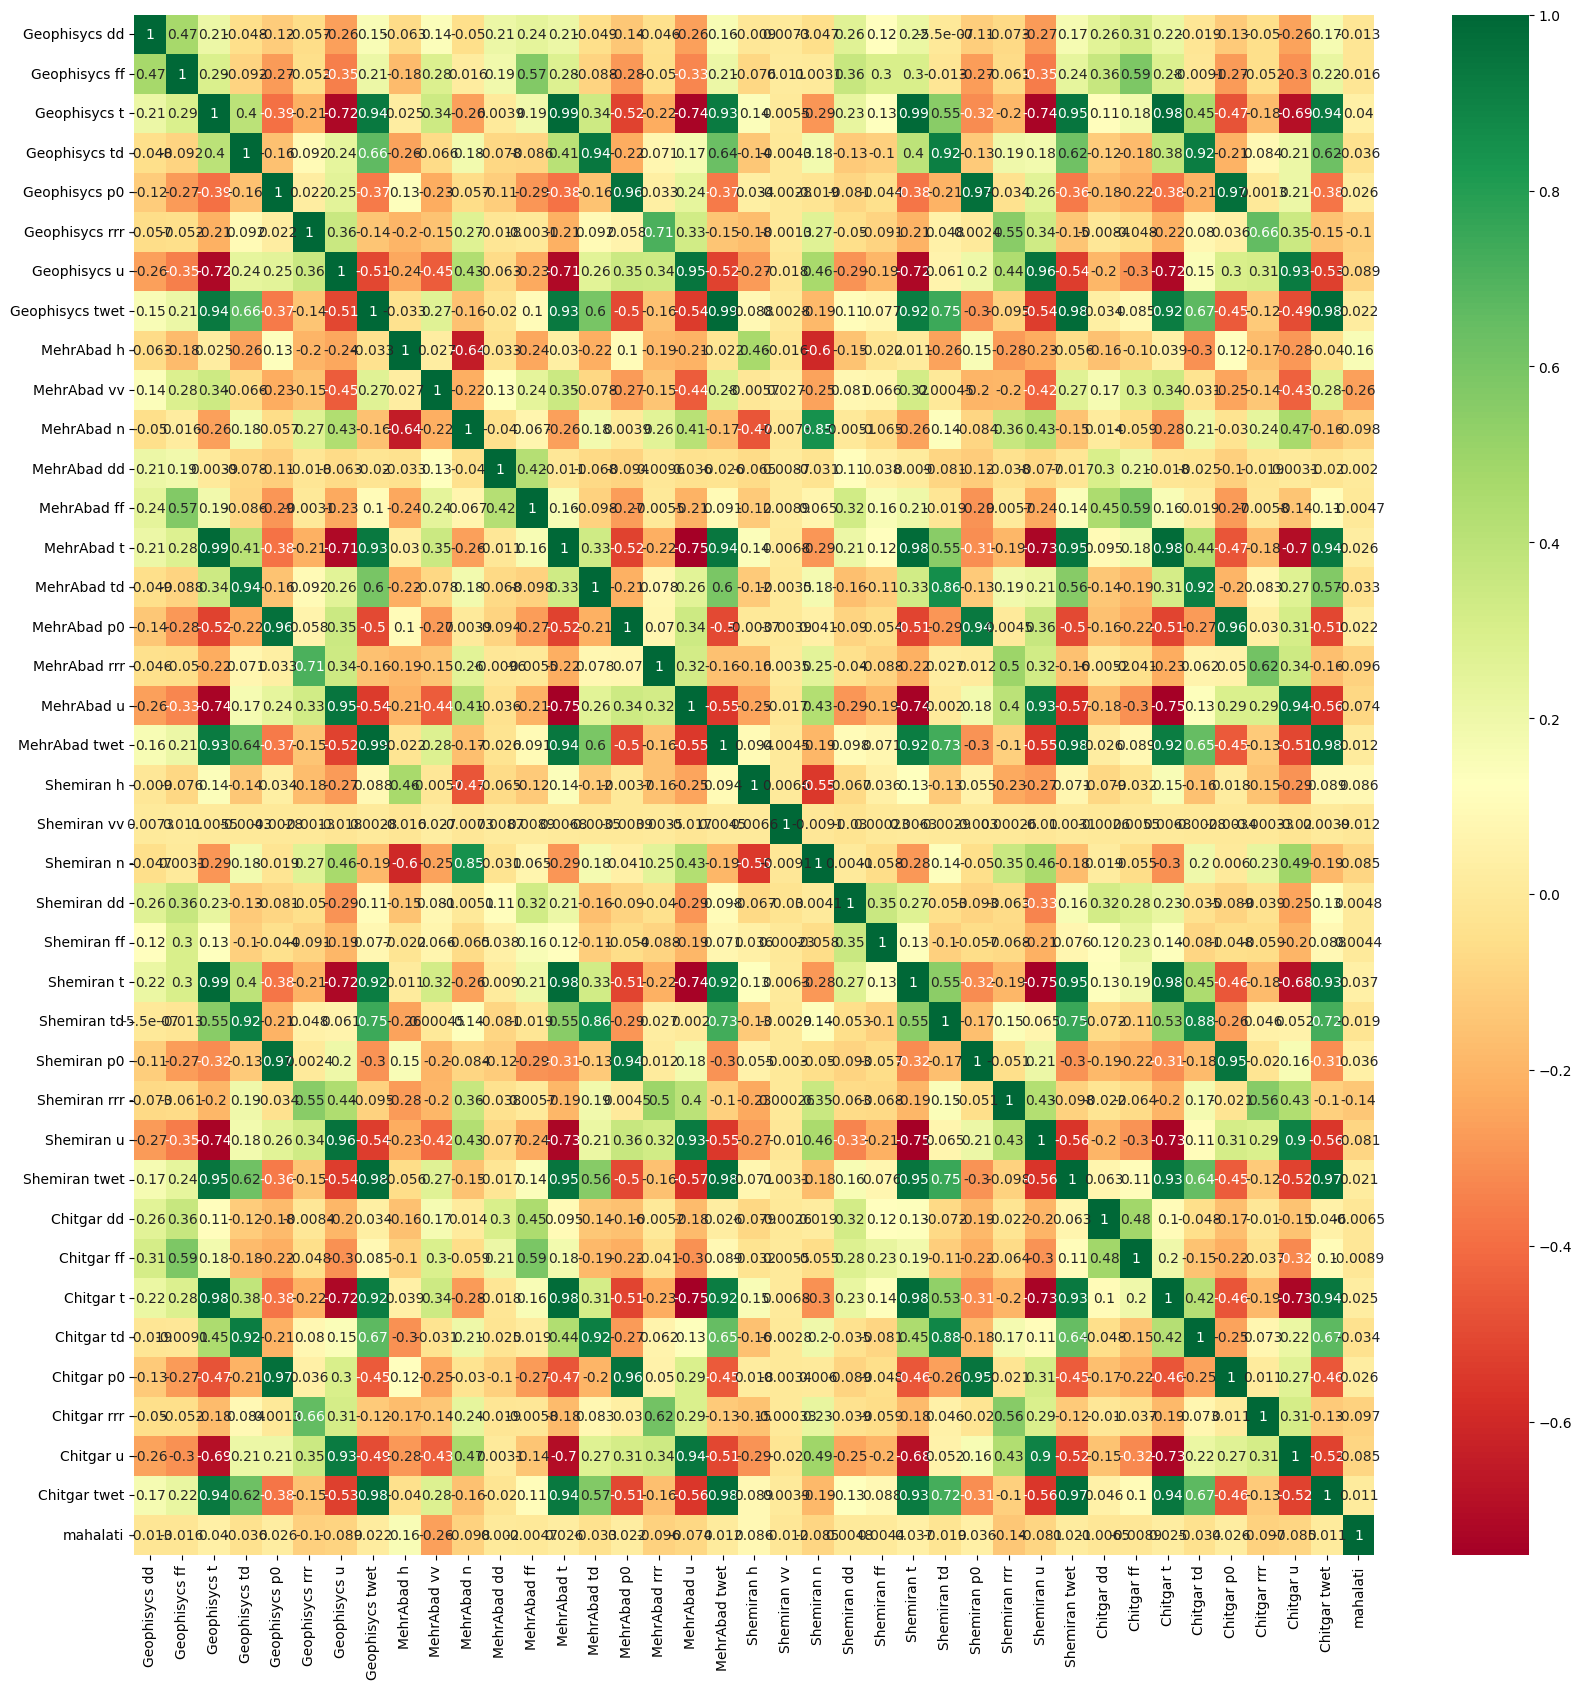

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
ExportedJpegURL =  '/content/drive/My Drive/Exported_Jpeg/'

#get correlations of each features in dataset
corrmat = climatologydaysTemp.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(climatologydaysTemp[top_corr_features].corr(),annot=True,cmap="RdYlGn")
plt.savefig(ExportedJpegURL+ 'Corolation of '+stationName+'.jpg')


In [ ]:
print(corrmat[stationName]*100)

Geophisycs dd       -1.283123
Geophisycs ff       -1.648004
Geophisycs t         4.043911
Geophisycs td       -3.557183
Geophisycs p0        2.627013
Geophisycs rrr     -10.315130
Geophisycs u        -8.888233
Geophisycs twet      2.179075
MehrAbad h          15.569252
MehrAbad vv        -26.110177
MehrAbad n          -9.785989
MehrAbad dd          0.195356
MehrAbad ff         -0.469191
MehrAbad t           2.645974
MehrAbad td         -3.339924
MehrAbad p0          2.210466
MehrAbad rrr        -9.633446
MehrAbad u          -7.415913
MehrAbad twet        1.223123
Shemiran h           8.593211
Shemiran vv         -1.185923
Shemiran n          -8.535375
Shemiran dd          0.481335
Shemiran ff          0.444541
Shemiran t           3.720666
Shemiran td         -1.949628
Shemiran p0          3.572646
Shemiran rrr       -14.025402
Shemiran u          -8.092592
Shemiran twet        2.134319
Chitgar dd          -0.651454
Chitgar ff          -0.892434
Chitgar t            2.545736
Chitgar td

# feature importance

In [ ]:
y=climatologydaysTemp[stationName] ## dependent features
climatologydaysTemp.drop(newtrain[[stationName]], axis=1, inplace=True)## independent features
X = climatologydaysTemp.copy() ## independent features

In [ ]:
display(climatologydaysTemp)


,Geophisycs dd,Geophisycs ff,Geophisycs t,Geophisycs td,Geophisycs p0,Geophisycs rrr,Geophisycs u,Geophisycs twet,MehrAbad h,MehrAbad vv,...,Shemiran u,Shemiran twet,Chitgar dd,Chitgar ff,Chitgar t,Chitgar td,Chitgar p0,Chitgar rrr,Chitgar u,Chitgar twet
Datetime,,,,,,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,0.000000,0.000000,8.500000,3.500000,860.800000,0.000000,71.000000,6.200000,2500.000000,3000.000000,...,86.000000,5.500000,100.000000,2.000000,8.600000,3.200000,872.600000,0.000000,69.000000,6.100000
2017-01-01 01:00:00,-3.146146,-0.401904,8.324082,3.594225,860.476095,0.241189,101.436166,6.339663,4056.579245,-3164.250545,...,79.278368,5.818151,206.002360,0.825747,6.838466,3.044542,872.472481,0.131737,109.759781,5.949074
2017-01-01 02:00:00,-7.778905,-0.430501,8.850755,3.474229,860.293824,0.235196,93.725058,6.713643,3559.705506,-1033.074951,...,81.174302,6.445416,114.081783,0.433913,6.797034,2.956501,872.209821,0.129059,99.585610,6.545039
2017-01-01 03:00:00,0.000000,0.000000,8.400001,4.200000,860.200000,0.021370,75.000000,6.400000,2500.000000,3000.000000,...,81.000000,5.800000,0.000000,0.000000,7.200000,3.100000,872.100000,0.095946,76.000000,5.400000
2017-01-01 04:00:00,23.646397,0.258712,10.428945,3.251777,859.966650,0.223391,58.930410,7.347152,1624.182856,5820.449732,...,75.311921,7.275067,-53.648297,0.774126,9.224263,2.969347,871.751214,0.123774,57.347295,7.503315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-28 17:00:00,276.104146,1.217110,22.258982,-2.873042,858.753354,-0.201595,19.077159,10.837566,1008.415181,21593.177429,...,24.203723,11.081589,50.513167,2.673716,24.985063,-2.551484,869.900593,-0.253852,15.429228,12.099848
2022-05-28 18:00:00,360.000000,2.000000,20.600000,-1.800000,859.200000,0.000000,22.000000,10.200000,1000.000000,10000.000000,...,28.000000,10.500000,10.000000,3.000000,24.000000,-3.300000,870.300000,0.000000,16.000000,11.400000
2022-05-28 19:00:00,416.656602,1.004653,20.060277,-1.124753,858.957785,-0.206663,22.940087,9.864872,1091.765187,-29524.586590,...,31.806327,9.475646,-14.474355,2.573368,22.931864,-3.331265,870.080764,-0.260069,16.712351,10.934938


In [ ]:
stationName ='mahalati'
climatologydaysTemp = Maindf
climatologydaysTemp[stationName] = dfKNN[stationName]


**donwsampling**

In [ ]:
climatologydaysTemp[stationName] = airpollutiondays[stationName]


In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [ ]:
print(model.feature_importances_)

[0.01950172 0.03192568 0.02100013 0.02103161 0.02326093 0.01843746
 0.02206668 0.01956686 0.03293092 0.12050118 0.02350317 0.01995259
 0.02619197 0.02396011 0.02051248 0.02281061 0.01953623 0.02729387
 0.0178828  0.0186747  0.09311604 0.02015465 0.02291735 0.01577626
 0.01720115 0.02079799 0.02226323 0.0204435  0.02390024 0.01803436
 0.01865991 0.02443806 0.01997694 0.02265257 0.02306203 0.02082616
 0.02596521 0.01927266]


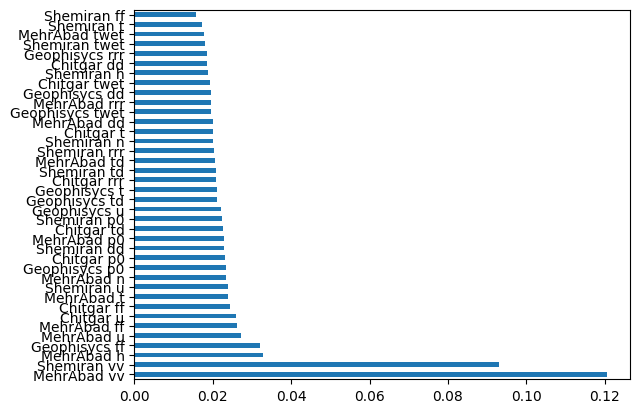

<Figure size 2000x2000 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [ ]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(38).plot(kind='barh')
plt.figure(figsize=(25,20))

plt.show()
plt.savefig(ExportedJpegURL+ 'feat_importances of'+stationName+'.jpg')


## prediction

In [ ]:
import matplotlib.pyplot as plt
ExportedJpegURL =  '/content/drive/My Drive/Exported_Jpeg/'

def get_n_last_days(df, series_name, n_days):
    """
    Extract last n_days of an hourly time series
    """

    return df[series_name][-(n_days):]

def plot_n_last_days(df, series_name, n_days):
    """
    Plot last n_days of an hourly time series
    """
    plt.figure(figsize=(25,20))
    plt.figure(figsize = (10,5))
    plt.plot(get_n_last_days(df, series_name, n_days), 'k-')
    plt.title('{0} Air Quality Time Series - {1} days'
              .format(series_name, n_days))
    plt.xlabel('Recorded Hour')
    plt.ylabel('Reading')
    plt.grid(alpha=0.3)
    plt.savefig(ExportedJpegURL+ 'Plot last n_days of'+stationName+'.jpg')



<Figure size 2500x2000 with 0 Axes>

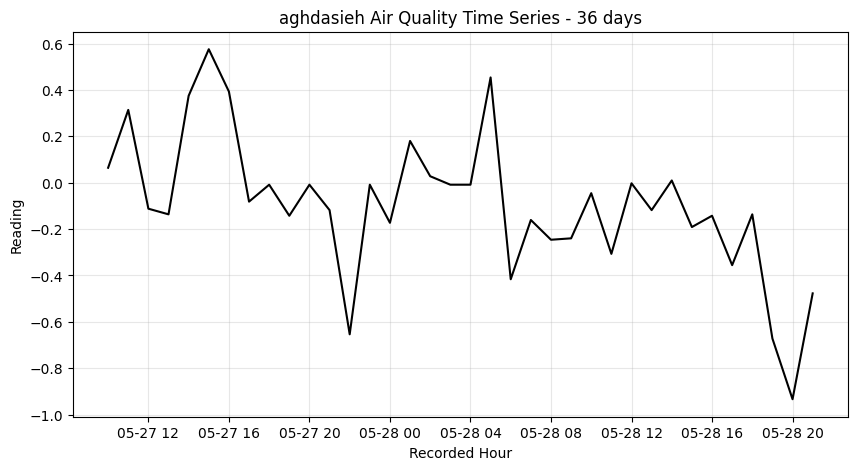

In [ ]:


plot_n_last_days(climatologydaysTemp.astype(float),stationName,36)

In [ ]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, LSTM, Activation, Dropout
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras import metrics
ExportedJpegURL =  '/content/drive/My Drive/Exported_Jpeg/'
def predict(X_init, n_steps, model):
    """
    Given an input series matching the model's expected format,
    generates model's predictions for next n_steps in the series
    """

    X_init = X_init.copy().reshape(1,-1,1)
    preds = []

    # iteratively take current input sequence, generate next step pred,
    # and shift input sequence forward by a step (to end with latest pred).
    # collect preds as we go.
    for _ in range(n_steps):
        pred = model.predict(X_init)
        preds.append(pred)
        X_init[:,:-1,:] = X_init[:,1:,:] # replace first 11 values with 2nd through 12th
        X_init[:,-1,:] = pred # replace 12th value with prediction

    predss = np.array(preds).reshape(-1,1)

    return predss,preds

def predict_and_plot(X_init, y, model, title, stationname):
    """
    Given an input series matching the model's expected format,
    generates model's predictions for next n_steps in the series,
    and plots these predictions against the ground truth for those steps

    arguments
    ---------
    X_init (array): initial sequence, must match model's input shape
    y (array): true sequence values to predict, follow X_init
    model (keras.models.Sequential): trained neural network
    title (string): plot title
    """

    y_preds,ypreds = predict(test_X_init, n_steps=len(y), model=model) # predict through length of y
    # Below ranges are to set x-axes
    start_range = range(1, test_X_init.shape[0]+1) #starting at one through to length of test_X_init to plot X_init
    predict_range = range(test_X_init.shape[0], test_hours)  #predict range is going to be from end of X_init to length of test_hours

    #using our ranges we plot X_init
    plt.plot(start_range, test_X_init)
    #and test and actual preds
    plt.plot(predict_range, test_y, color='orange')
    plt.plot(predict_range, y_preds, color='teal', linestyle='--')

    plt.title(title)
    plt.legend(['Initial Series','Target Series','Predictions'])
    plt.savefig(ExportedJpegURL+stationname+'_Chart.jpg')
    return ypreds

In [ ]:
import numpy as np
def get_keras_format_series(series,features):
    """
    Convert a series to a numpy array of shape
    [n_samples, time_steps, features]
    """

    series = np.array(series)
    return series.reshape(series.shape[0], series.shape[1], features)


def get_train_test_data(df, series_name, series_days, input_hours,
                        test_hours, sample_gap=3):
    """
    Utility processing function that splits an hourly time series into
    train and test with keras-friendly format, according to user-specified
    choice of shape.

    arguments
    ---------
    df (dataframe): dataframe with time series columns
    series_name (string): column name in df
    series_days (int): total days to extract
    input_hours (int): length of sequence input to network
    test_hours (int): length of held-out terminal sequence
    sample_gap (int): step size between start of train sequences; default 5

    returns
    ---------
    tuple: train_X, test_X_init, train_y, test_y
    """

    forecast_series = get_n_last_days(df, series_name, series_days).values # reducing our forecast series to last n days

    train = forecast_series[:-test_hours] # training data is remaining days until amount of test_hours
    test = forecast_series[-test_hours:] # test data is the remaining test_hours

    train_X, train_y = [], []

    # range 0 through # of train samples - input_hours by sample_gap.
    # This is to create many samples with corresponding
    for i in range(0, train.shape[0]-input_hours, sample_gap):
        train_X.append(train[i:i+input_hours]) # each training sample is of length input hours
        train_y.append(train[i+input_hours]) # each y is just the next step after training sample

    train_X = get_keras_format_series(train_X,1) # format our new training set to keras format
    train_y = np.array(train_y) # make sure y is an array to work properly with keras

    # The set that we had held out for testing (must be same length as original train input)
    test_X_init = test[:input_hours]
    test_y = test[input_hours:] # test_y is remaining values from test set

    return train_X, test_X_init, train_y, test_y
from keras import backend as K

def coeff_determination(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true-y_pred ))
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )




In [ ]:
series_days = 610
input_hours = 8
test_hours = 16
station_name = 'mahalati'
train_X, test_X_init, train_y, test_y = (get_train_test_data(climatologydaysTemp, station_name, series_days,  input_hours, test_hours))
print('Training input shape: {}'.format(train_X.shape))
print('Training output shape: {}'.format(train_y.shape))
print('Test input shape: {}'.format(test_X_init.shape))
print('Test output shape: {}'.format(test_y.shape))

NameError: ignored

## We need these functions for predition

## **LSTM**

In [ ]:
def fit_LSTM(train_X, train_y, cell_units, epochs):
    """
    Fit LSTM to data train_X, train_y

    arguments
    ---------
    train_X (array): input sequence samples for training
    train_y (list): next step in sequence targets
    cell_units (int): number of hidden units for LSTM cells
    epochs (int): number of training epochs
    """

    # initialize model
    model = Sequential()
    callback = tf.keras.callbacks.EarlyStopping(monitor='loss',
    min_delta=0.000001,
    patience=200,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=True,
    start_from_epoch=3000)
    # construct a LSTM layer with specified number of hidden units
    # per cell and desired sequence input format
   # model.add(LSTM(cell_units, input_shape=(train_X.shape[1],1) ,return_sequences= True))
    #model.add(LSTM(cell_units, input_shape=(train_X.shape[1],1) ,return_sequences= True))
    #model.add(LSTM(cell_units, input_shape=(train_X.shape[1],1) ,return_sequences= True))
    model.add(LSTM(cell_units, input_shape=(train_X.shape[1],1)))

    # add an output layer to make final predictions
    model.add(Dense(1))

    # define the loss function / optimization strategy, and fit
    # the model with the desired number of passes over the data (epochs)
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse', 'mae', 'mape',coeff_determination])
    history = model.fit(train_X, train_y, epochs=epochs, batch_size=1000,callbacks=[callback], verbose= 0)

    return model,history



In [ ]:
#model,history = fit_LSTM(train_X, train_y, cell_units=210, epochs=6500)
modelLSTM,historyLSTM = fit_LSTM(train_X, train_y, cell_units=1970, epochs=7000)
# if cell unit was 10 then ot will be better for show in papers
#modelLSTM,historyLSTM = fit_LSTM(train_X, train_y, cell_units=30, epochs=12000)

modelLSTM.summary()

1/1 [==============================] - 0s 19ms/step


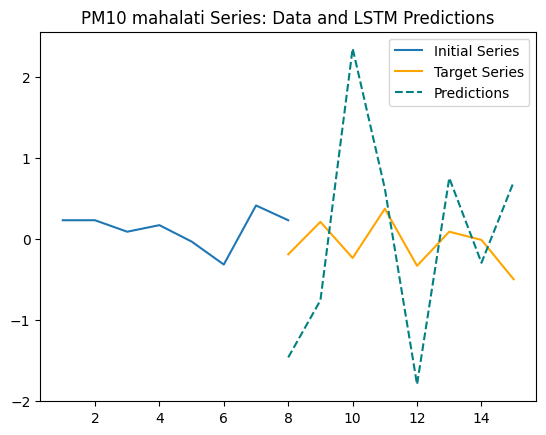

In [ ]:
y_predsLSTM = predict_and_plot(test_X_init, test_y, modelLSTM, 'PM10 '+stationName+' Series: Data and LSTM Predictions',stationName)
#11000

Text(0, 0.5, 'Predictions')

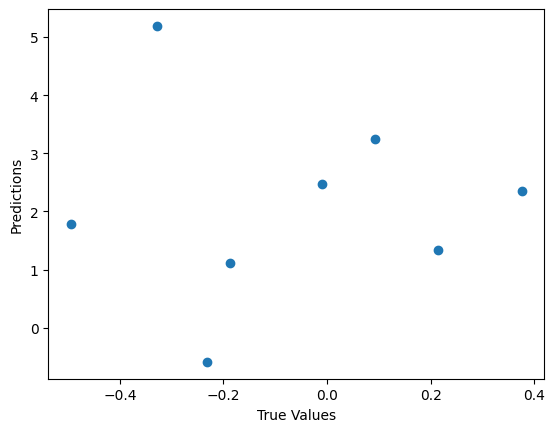

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(test_y,y_predsLSTM)
plt.xlabel('True Values')
plt.ylabel('Predictions')

In [ ]:
print('MAE:', metrics.mean_absolute_error(test_y, y_predsLSTM))
#print('R^2:', metrics.coeff_determination(test_y, y_predsLSTM))
print('MSE:', metrics.mean_squared_error(test_y, y_predsLSTM))
print('RMSE:', np.sqrt(metrics.mean_squared_error(test_y, y_predsLSTM)))


MAE: tf.Tensor(
[[0.78881156]
 [0.5890047 ]
 [0.78783154]
 [0.88181424]
 [1.0031719 ]
 [1.1169223 ]
 [1.245054  ]
 [1.3426626 ]], shape=(8, 1), dtype=float32)


AttributeError: ignored

In [ ]:
x = np.array(historyLSTM.history['coeff_determination']).max()
maxIndexOfR2 = np.where(x == np.amax(x))
print('maxIndexOfR2:',x)
print(maxIndexOfR2)
x = np.array(historyLSTM.history['mae']).min()
maxIndexOfR2 = np.where(x == np.amin(x))
print('mae:',x)
x = np.array(historyLSTM.history['mse']).min()
maxIndexOfR2 = np.where(x == np.amin(x))
print('mse:',x)
x = np.array(historyLSTM.history['mse']).min()
maxIndexOfR2 = np.where(x == np.amin(x))
print('rmse:',np.sqrt(x))

maxIndexOfR2: 0.9999992847442627
(array([0]),)
mae: 0.0018820393597707152
mse: 9.663912351243198e-06
rmse: 0.0031086833790598873


In [ ]:
def plotAccuracy(cvc):
    t = cvc.index
    #headerList =cvc.columns.tolist()
    fig, axes = plt.subplots(2, 2, sharex=False, sharey=False)
    fig.set_figheight(10)
    fig.set_figwidth(15)
    #fig.supylabel('ug/m3', y=0.15, fontsize=14)
    fig.suptitle("Accuracy of PM10 "+stationName, fontsize=16)
    axes[0,0].plot(t, cvc['mse'], 'r' )
    axes[0,0].set_title("Mean squared error", loc='center', color='black' )
    axes[1,1].plot(t, cvc['mae'], 'y')
    axes[1,1].set_title("Mean absolute error", loc='center', color='gray' )
    axes[1,0].plot(t, cvc['rmse'], 'b' )
    axes[1,0].set_title("Root mean square deviation", loc='center', color='black' )
    axes[0,1].plot(t, cvc['coeff_determination'], 'b' )
    axes[0,1].set_title("R-squared (R2)", loc='center', color='black' )
    plt.savefig(ExportedJpegURL+ stationName + '_Accuracy.jpg')

    #axes[i].legend(loc='upper left');
cvc = pd.DataFrame(columns=['A'])
cvc['mse'] = historyLSTM.history['mse']
cvc['mae'] = historyLSTM.history['mae']
cvc['rmse'] = np.sqrt(historyLSTM.history['mse'])
cvc['coeff_determination'] = historyLSTM.history['coeff_determination']

plotAccuracy(cvc)

NameError: ignored

In [ ]:
# =======================
# in Ezafe beshe Exported_ISPRS
ExportedDataframURL =  '/content/drive/My Drive/Exported_ISPRS/'
twoDT = pd.DataFrame(columns=['Prediction'])
twoDT['Main'] = climatologydaysTemp[stationName][-input_hours:]
twoDT.reset_index(inplace=True)
twoDT['Prediction'] = pd.DataFrame(data=np.concatenate( y_predsLSTM, axis=0 ))
twoDT['Datetime'] = pd.DatetimeIndex(twoDT['Datetime'])
twoDT.set_index('Datetime',inplace = True)
twoDT = twoDT.sort_index()
twoDT['reversed_output']= twoDT['Main'] * twoDT['Prediction'].std() + twoDT['Prediction'].mean()
twoDT.to_excel(ExportedDataframURL+ stationName +".xlsx")


In [ ]:
# =======================
# in Ezafe beshe Exported_ISPRS
ExportedDataframURL =  '/content/drive/My Drive/Exported_ISPRS/'
climatologydaysTemp = newtrain.copy()

#climatologydaysTemp.drop(newtrain[[stationName]], axis=1, inplace=True)## independent features
for stationName in dfKNN.columns:
  print(stationName)
  climatologydaysTemp[stationName] = dfKNN[stationName]
  train_X, test_X_init, train_y, test_y = (get_train_test_data(climatologydaysTemp, stationName, series_days,  input_hours, test_hours))
  #model,history = fit_LSTM(train_X, train_y, cell_units=210, epochs=6500)
  plt.close()
  modelLSTM,historyLSTM = fit_LSTM(train_X, train_y, cell_units=1970, epochs=7000)
  modelLSTM.summary()
  y_predsLSTM = predict_and_plot(test_X_init, test_y, modelLSTM, 'PM10 '+stationName+' Series: Data and LSTM Predictions',stationName)
  plt.close()
  cvc = pd.DataFrame(columns=['A'])
  cvc['mse'] = historyLSTM.history['mse']
  cvc['mae'] = historyLSTM.history['mae']
  cvc['rmse'] = np.sqrt(historyLSTM.history['mse'])
  cvc['coeff_determination'] = historyLSTM.history['coeff_determination']
  print('RMSE:', np.sqrt(cvc['mse']).max())
  print('MAE:', cvc['mae'].max())
  print('R^2:', cvc['coeff_determination'].max())
  print('MSE:', cvc['mse'].max())
  plotAccuracy(cvc)
  plt.close()
  twoDT = pd.DataFrame(columns=['Prediction'])
  twoDT['Main'] = climatologydaysTemp[stationName][-input_hours:]
  twoDT.reset_index(inplace=True)
  twoDT['Prediction'] = pd.DataFrame(data=np.concatenate( y_predsLSTM, axis=0 ))
  twoDT['Datetime'] = pd.DatetimeIndex(twoDT['Datetime'])
  twoDT.set_index('Datetime',inplace = True)
  twoDT = twoDT.sort_index()
  twoDT['reversed_output']= twoDT['Main'] * twoDT['Prediction'].std() + twoDT['Prediction'].mean()
  twoDT.to_excel(ExportedDataframURL+ stationName +".xlsx")
  climatologydaysTemp.drop(climatologydaysTemp[[stationName]], axis=1, inplace=True)## independent features



mahalati
aghdasieh
pounak
pirouzi
tarbiatModares
setadBohran
shadAbad
sharif
mantaghe20
mantaghe2
mantaghe16
mantaghe19
mantaghe21
mantaghe22
golbarg
masoudieh
fath


# GRU

In [ ]:
from keras.models import Sequential
from keras.layers import GRU, Dense
def fit_GRU(train_X, train_y, cell_units, epochs):
    """
    Fit LSTM to data train_X, train_y

    arguments
    ---------
    train_X (array): input sequence samples for training
    train_y (list): next step in sequence targets
    cell_units (int): number of hidden units for GRU cells
    epochs (int): number of training epochs
    """

    # initialize model
    model = Sequential()
    callback = tf.keras.callbacks.EarlyStopping(monitor='loss',
    min_delta=0.000001,
    patience=200,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=True,
    start_from_epoch=3000)
    # construct a GRU layer with specified number of hidden units
    # per cell and desired sequence input format
   # model.add(GRU(cell_units, input_shape=(train_X.shape[1],1) ,return_sequences= True))
    #model.add(GRU(cell_units, input_shape=(train_X.shape[1],1) ,return_sequences= True))
    #model.add(GRU(cell_units, input_shape=(train_X.shape[1],1) ,return_sequences= True))
    model.add(GRU(cell_units, input_shape=(train_X.shape[1],1)))

    # add an output layer to make final predictions
    model.add(Dense(1))

    # define the loss function / optimization strategy, and fit
    # the model with the desired number of passes over the data (epochs)
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse', 'mae', 'mape',coeff_determination])
    history = model.fit(train_X, train_y, epochs=epochs, batch_size=1000,callbacks=[callback], verbose= 0)

    return model,history

In [ ]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, LSTM, Activation, Dropout
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras import metrics
ExportedJpegURL =  '/content/drive/My Drive/Exported_Jpeg/'
def predict(X_init, n_steps, model):
    """
    Given an input series matching the model's expected format,
    generates model's predictions for next n_steps in the series
    """

    X_init = X_init.copy().reshape(1,-1,1)
    preds = []

    # iteratively take current input sequence, generate next step pred,
    # and shift input sequence forward by a step (to end with latest pred).
    # collect preds as we go.
    for _ in range(n_steps):
        pred = model.predict(X_init)
        preds.append(pred)
        X_init[:,:-1,:] = X_init[:,1:,:] # replace first 11 values with 2nd through 12th
        X_init[:,-1,:] = pred # replace 12th value with prediction

    predss = np.array(preds).reshape(-1,1)

    return predss,preds

def predict_and_plot(X_init, y, model, title, stationname):
    """
    Given an input series matching the model's expected format,
    generates model's predictions for next n_steps in the series,
    and plots these predictions against the ground truth for those steps

    arguments
    ---------
    X_init (array): initial sequence, must match model's input shape
    y (array): true sequence values to predict, follow X_init
    model (keras.models.Sequential): trained neural network
    title (string): plot title
    """

    y_preds,ypreds = predict(test_X_init, n_steps=len(y), model=model) # predict through length of y
    # Below ranges are to set x-axes
    start_range = range(1, test_X_init.shape[0]+1) #starting at one through to length of test_X_init to plot X_init
    predict_range = range(test_X_init.shape[0], test_hours)  #predict range is going to be from end of X_init to length of test_hours

    #using our ranges we plot X_init
    plt.plot(start_range, test_X_init)
    #and test and actual preds
    plt.plot(predict_range, test_y, color='orange')
    plt.plot(predict_range, y_preds, color='teal', linestyle='--')

    plt.title(title)
    plt.legend(['Initial Series','Target Series','Predictions'])
    plt.savefig(ExportedJpegURL+stationname+'_Chart'+'GRU'+'.jpg')
    return ypreds

In [ ]:
def plotAccuracy(cvc):
    t = cvc.index
    #headerList =cvc.columns.tolist()
    fig, axes = plt.subplots(2, 2, sharex=False, sharey=False)
    fig.set_figheight(10)
    fig.set_figwidth(15)
    #fig.supylabel('ug/m3', y=0.15, fontsize=14)
    fig.suptitle("Accuracy of PM10 "+stationName, fontsize=16)
    axes[0,0].plot(t, cvc['mse'], 'r' )
    axes[0,0].set_title("Mean squared error", loc='center', color='black' )
    axes[1,1].plot(t, cvc['mae'], 'y')
    axes[1,1].set_title("Mean absolute error", loc='center', color='gray' )
    axes[1,0].plot(t, cvc['rmse'], 'b' )
    axes[1,0].set_title("Root mean square deviation", loc='center', color='black' )
    axes[0,1].plot(t, cvc['coeff_determination'], 'b' )
    axes[0,1].set_title("R-squared (R2)", loc='center', color='black' )
    plt.savefig(ExportedJpegURL+ stationName + '_Accuracy'+'GRU'+'.jpg')

In [ ]:
# =======================
# in Ezafe beshe Exported_ISPRS
ExportedDataframURL =  '/content/drive/My Drive/Exported_ISPRS/'
climatologydaysTemp = newtrain.copy()

#climatologydaysTemp.drop(newtrain[[stationName]], axis=1, inplace=True)## independent features
for stationName in dfKNN.columns:
  print(stationName)
  climatologydaysTemp[stationName] = dfKNN[stationName]
  train_X, test_X_init, train_y, test_y = (get_train_test_data(climatologydaysTemp, stationName, series_days,  input_hours, test_hours))
  #model,history = fit_LSTM(train_X, train_y, cell_units=210, epochs=6500)
  plt.close()
  modelLSTM,historyLSTM = fit_GRU(train_X, train_y, cell_units=1970, epochs=7)
  modelLSTM.summary()
  y_predsLSTM = predict_and_plot(test_X_init, test_y, modelLSTM, 'PM10 '+stationName+' Series: Data and GRU Predictions',stationName)
  plt.close()
  cvc = pd.DataFrame(columns=['A'])
  cvc['mse'] = historyLSTM.history['mse']
  cvc['mae'] = historyLSTM.history['mae']
  cvc['rmse'] = np.sqrt(historyLSTM.history['mse'])
  cvc['coeff_determination'] = historyLSTM.history['coeff_determination']
  print(' on train:')
  print('RMSE:', np.sqrt(cvc['mse']).max())
  print('MAE:', cvc['mae'].max())
  print('R^2:', cvc['coeff_determination'].max())
  print('MSE:', cvc['mse'].max())
  plotAccuracy(cvc)
  plt.close()
  print(' on test:')

  twoDT = pd.DataFrame(columns=['Prediction'])
  twoDT['Main'] = climatologydaysTemp[stationName][-input_hours:]
  twoDT.reset_index(inplace=True)
  twoDT['Prediction'] = pd.DataFrame(data=np.concatenate( y_predsLSTM, axis=0 ))
  twoDT['Datetime'] = pd.DatetimeIndex(twoDT['Datetime'])
  twoDT.set_index('Datetime',inplace = True)
  twoDT = twoDT.sort_index()
  twoDT['reversed_output']= twoDT['Main'] * twoDT['Prediction'].std() + twoDT['Prediction'].mean()
  twoDT.to_excel(ExportedDataframURL+ stationName +"_GRU.xlsx")
  climatologydaysTemp.drop(climatologydaysTemp[[stationName]], axis=1, inplace=True)## independent features


mahalati
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_7 (GRU)                 (None, 1970)              11660430  
                                                                 
 dense_7 (Dense)             (None, 1)                 1971      
                                                                 
Total params: 11,662,401
Trainable params: 11,662,401
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 26ms/step
RMSE: 2.1074772942971056
MAE: 1.0132766706602914
R^2: 0.613350340298244
MSE: 5.066450936453683
aghdasieh
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_8 (GRU)                 (None, 1970)              11660430  
                                                    